# RNN 을 활용한 시계열 예측
- 시계열 함수

In [1]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4,batch_size, 1)
    time = np.linspace(0,1,n_steps)
    series = 0.5*np.sin((time - offsets1)*(freq1*10+10)) #사인 곡선1
    series += 0.2*np.sin((time - offsets2)*(freq1*20+20)) #+사인 곡선2
    series += 0.1*(np.random.rand(batch_size, n_steps)-0.5) #잡음
    return series[..., np.newaxis].astype(np.float32)

In [2]:
import numpy as np
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [3]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

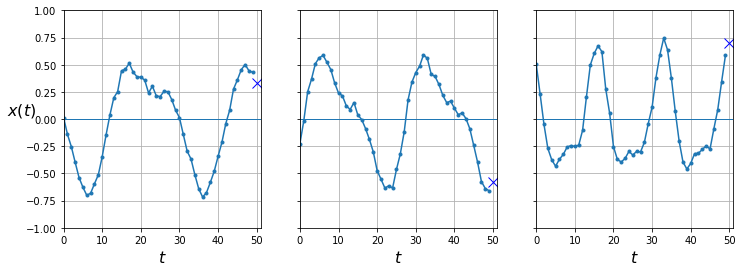

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()

### naive forecasting

In [10]:
# import sklearn
# import tensorflow as tf
# from tensorflow import keras
# y_pred = X_valid[:,-1]
# np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

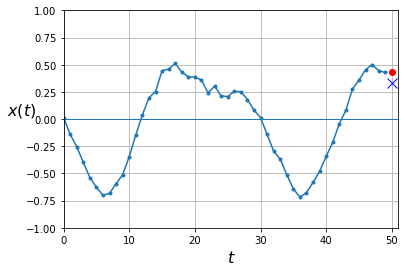

In [9]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

### 선형회귀 모델

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [50,1]),
    keras.layers.Dense(1)
])

In [13]:
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 1s 94us/sample - loss: 0.0711 - val_loss: 0.0343
Epoch 2/20
7000/7000 [==============================] - 0s 27us/sample - loss: 0.0235 - val_loss: 0.0173
Epoch 3/20
7000/7000 [==============================] - 0s 29us/sample - loss: 0.0134 - val_loss: 0.0109
Epoch 4/20
7000/7000 [==============================] - 0s 23us/sample - loss: 0.0095 - val_loss: 0.0084
Epoch 5/20
7000/7000 [==============================] - 0s 23us/sample - loss: 0.0078 - val_loss: 0.0072
Epoch 6/20
7000/7000 [==============================] - 0s 22us/sample - loss: 0.0069 - val_loss: 0.0065
Epoch 7/20
7000/7000 [==============================] - 0s 22us/sample - loss: 0.0062 - val_loss: 0.0058
Epoch 8/20
7000/7000 [==============================] - 0s 21us/sample - loss: 0.0057 - val_loss: 0.0055
Epoch 9/20
7000/7000 [==============================] - 0s 22us/sample - loss: 0.0053 - val_loss: 0.0052
Epoch 1

In [15]:
model.evaluate(X_valid, y_valid)
#나이브 프레딕션 보다 결과가 좋다!

2000/2000 [==============================] - 0s 18us/sample - loss: 0.0038


0.0037579880859702824

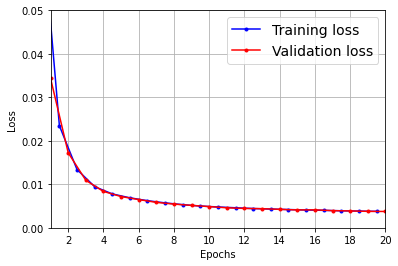

In [18]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

## 간단한 RNN구현

In [17]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape = [None, 1])
]) # 가장 간단한 rnn ,  하나의 뉴런으로 이루어진 하나의 층을 갖는다

In [19]:
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 3s 380us/sample - loss: 0.0943 - val_loss: 0.0488
Epoch 2/20
7000/7000 [==============================] - 2s 243us/sample - loss: 0.0367 - val_loss: 0.0292
Epoch 3/20
7000/7000 [==============================] - 2s 248us/sample - loss: 0.0249 - val_loss: 0.0216
Epoch 4/20
7000/7000 [==============================] - 2s 263us/sample - loss: 0.0194 - val_loss: 0.0174
Epoch 5/20
7000/7000 [==============================] - 2s 231us/sample - loss: 0.0162 - val_loss: 0.0149
Epoch 6/20
7000/7000 [==============================] - 2s 225us/sample - loss: 0.0143 - val_loss: 0.0133
Epoch 7/20
7000/7000 [==============================] - 2s 255us/sample - loss: 0.0130 - val_loss: 0.0123
Epoch 8/20
7000/7000 [==============================] - 2s 254us/sample - loss: 0.0122 - val_loss: 0.0116
Epoch 9/20
7000/7000 [==============================] - 2s 223us/sample - loss: 0.0117 - val_loss: 0.011